# The cutoff point

In this exercise, and throughout this chapter, you'll be working with the restaurants DataFrame which has data on various `restaurants`. Your ultimate goal is to create a restaurant recommendation engine, but you need to first clean your data.

This version of `restaurants` has been collected from many sources, where the `cuisine_type` column is riddled with typos, and should contain only `italian`, `american` and asian cuisine types. There are so many unique categories that remapping them manually isn't scalable, and it's best to use string similarity instead.

Before doing so, you want to establish the cutoff point for the similarity score using the `thefuzz`'s `process.extract()` function by finding the similarity score of the most distant typo of each category.

In [3]:
import pandas as pd
import numpy as np
from faker import Faker
import datetime as dt
import missingno as msno
import matplotlib.pyplot as plt
from thefuzz import fuzz

fake = Faker()
path=r'Z:/'
file='restaurants_L2.csv'
restaurants = pd.read_csv(path+file,index_col = [0]) #,parse_dates=['birth_date']
#acct_cur = [fake.random_element(elements=('dollar', 'euro')) for _ in range(len(banking))]
#banking['acct_cur']=acct_cur
restaurants = restaurants.rename(columns={'name':'rest_name','addr':'rest_addr','type':'cuisine_type'})
print(restaurants.head(),'\n')

                   rest_name                  rest_addr         city  \
0  arnie morton's of chicago   435 s. la cienega blv .   los angeles   
1         art's delicatessen       12224 ventura blvd.   studio city   
2                  campanile       624 s. la brea ave.   los angeles   
3                      fenix    8358 sunset blvd. west     hollywood   
4         grill on the alley           9560 dayton way   los angeles   

        phone cuisine_type  
0  3102461501     american  
1  8187621221     american  
2  2139381447     american  
3  2138486677     american  
4  3102760615     american   



* Import `process` from `thefuzz`.
* Store the unique `cuisine_types` into `unique_types`.
* Calculate the similarity of `'asian'`, `'american'`, and `'italian'` to all possible `cuisine_types` using `process.extract()`, while returning all possible matches.

In [7]:
# Import process from thefuzz
from thefuzz import process

# Store the unique values of cuisine_type in unique_types
unique_types = restaurants['cuisine_type'].unique()

# Calculate similarity of 'asian' to all values of unique_types
print(process.extract('asian', unique_types, limit = len(unique_types)))

# Calculate similarity of 'american' to all values of unique_types
print(process.extract('american', unique_types, limit = len(unique_types)))

# Calculate similarity of 'italian' to all values of unique_types
print(process.extract('italian', unique_types, limit = len(unique_types)))

[('asian', 100), ('italian', 67), ('american', 62), ('mexican', 50), ('steakhouses', 40), ('cajun', 40), ('southwestern', 36), ('southern', 31), ('coffeebar', 26)]
[('american', 100), ('mexican', 80), ('cajun', 68), ('asian', 62), ('italian', 53), ('southwestern', 49), ('southern', 38), ('coffeebar', 24), ('steakhouses', 21)]
[('italian', 100), ('asian', 67), ('american', 53), ('mexican', 43), ('cajun', 33), ('southwestern', 33), ('steakhouses', 33), ('southern', 27), ('coffeebar', 12)]


Question

Take a look at the output, what do you think should be the similarity cutoff point when remapping categories?

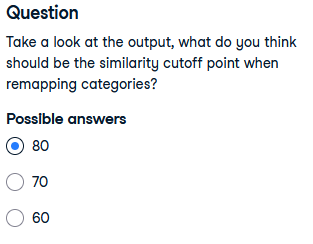